In [ ]:
import pandas as pd
import numpy as np
import json
from typing import List
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# from deepdiff import DeepDiff

In [ ]:
# Load the german_credit dataset

df = pd.read_csv('../data/german_credit.csv')
df.head()

In [ ]:
df.columns

In [ ]:
column_mapping = {
    'Creditability': 'creditability',
    'Account Balance': 'account_balance',
    'Duration of Credit (month)': 'duration_of_credit_in_months',
    'Payment Status of Previous Credit': 'payment_status_of_previous_credit',
    'Purpose': 'purpose',
    'Credit Amount': 'credit_amount',
    'Value Savings/Stocks': 'savings_stocks',
    'Length of current employment': 'length_of_current_employment',
    'Instalment per cent': 'instalment_per_cent',
    'Sex & Marital Status': 'sex_marital_status',
    'Guarantors': 'guarantors',
    'Duration in Current address': 'duration_in_current_address',
    'Most valuable available asset': 'most_valuable_available_asset',
    'Age (years)': 'age_in_years',
    'Concurrent Credits': 'concurrent_credits',
    'Type of apartment': 'type_of_apartment',
    'No of Credits at this Bank': 'no_of_credits_at_this_bank',
    'Occupation': 'occupation',
    'No of dependents': 'no_of_dependents',
    'Telephone': 'telephone',
    'Foreign Worker': 'foreign_worker'
}


df.rename(columns=column_mapping, inplace=True)
df.columns

In [ ]:
df.head()

### El conjunto de datos `german_credit.csv` contiene información sobre personas que solicitaron créditos bancarios en bancos alemanes en el año 1994. Contiene 20 variables:

- `creditability`: Variable binaria que indica si el solicitante devolvió el crédito (1) o no (0).

- `account_balance`: Variable que toma valores 1, 2, 3, o 4, indicando si el solicitante no tiene cuenta (1), tiene una cuenta poco balanceada (2) o bien balanceada (4).

- `duration_of_credit_in_months`: Duración del crédito en meses.

- `payment_status_of_previous_credit`: Variable que toma valores de 0 a 4, donde 0 indica que el solicitante no pagó y 4 indica que pagó todo en créditos previos.

- `purpose`: Variable que toma valores de 0 a 10, indicando el propósito del crédito solicitado. Por ejemplo, 0 puede representar la compra de un automóvil.

- `credit_amount`: Variable numérica que representa la cantidad de crédito solicitada.

- `savings_stocks`: Variable que representa el dinero ahorrado, con valores de 1 a 5, donde 1 significa "nada", 2 significa "≤100", 3 significa "(100,500]", y 4 significa "(500, 1000]".

- `length_of_current_employment`: Variable que toma valores de 1 a 5, representando el estado de empleo actual del solicitante, desde desempleado (1) hasta más de 7 años (5).

- `instalment_per_cent`: Variable que toma valores de 1 a 4, indicando el porcentaje de financiamiento del crédito, donde 1 representa más del 35%, 2 representa (25%, 35%), 3 representa [20%, 25%), y 4 representa menos del 20%.

- `sex_marital_status`: Variable que toma valores de 1 a 4, donde 1 representa "Male, Divorced", 2 representa "Male, Single", 3 representa "Male, Married/Widowed", y 4 representa "Female".

- `guarantors`: Variable que toma valores de 1 a 3, indicando la presencia de garantías, desde "Ninguno" hasta "garantía".

- `duration_in_current_address`: Variable que toma valores de 1 a 4, representando la duración en la dirección actual.

- `most_valuable_available_asset`: Variable que toma valores de 1 a 4, representando el activo más valioso disponible, desde "None" hasta "Real Estate".

- `age_in_years`: Variable numérica que representa la edad del solicitante.

- `concurrent_credits`: Variable que toma valores de 1 a 3, indicando la existencia de créditos concurrentes en otros bancos o entidades financieras.

- `type_of_apartment`: Variable que toma valores de 1 a 3, representando el tipo de vivienda, desde "Free" hasta "Owned".

- `no_of_credits_at_this_bank`: Variable que toma valores de 1 a 4, indicando la cantidad de créditos en este banco.

- `occupation`: Variable que toma valores de 1 a 4, representando la ocupación del solicitante, desde "Unemployed" hasta "Executive".

- `no_of_dependents`: Variable binaria que toma valores 1 o 2, indicando si el solicitante tiene más de 3 dependientes o menos de 3.

- `telephone`: Variable binaria que toma valores 1 o 2, representando si el solicitante tiene teléfono (sí o no).

- `foreign_worker`: Variable binaria que toma valores 1 o 2, indicando si el solicitante es un trabajador extranjero (sí o no).



### Transformar variables numericas a categoricas

#### Discretizar duration_of_credit_in_months

In [ ]:
df.duration_of_credit_in_months.unique()

In [ ]:
# Cada categoria representa un rango de meses.
# 1: 0 - 12
# 2: 12 - 24
# 3: 24 - 36
# 4: 36 - 48
# 5: 48 - 60
# 6: 60 - 72
# 7: 72 - inf
bins = [0, 12, 24, 36, 48, 60, 72, float('inf')] 
category_numbers = [1, 2, 3, 4, 5, 6, 7]
df['duration_of_credit_in_months'] = pd.cut(df['duration_of_credit_in_months'], bins=bins, labels=category_numbers)
df['duration_of_credit_in_months'] = df['duration_of_credit_in_months'].astype(int)

In [ ]:
df.duration_of_credit_in_months.describe()

#### Discretizar credit_amount

In [ ]:
df.credit_amount.describe()

In [ ]:
# Dividir en 4 categorias
# 1: 0 - 2500
# 2: 2500 - 5000
# 3: 5000 - 7500
# 4: 7500 - inf
bins = [0, 2500, 5000, 7500, float('inf')]
category_numbers = [1, 2, 3, 4]
df['credit_amount'] = pd.cut(df['credit_amount'], bins=bins, labels=category_numbers)
df['credit_amount'] = df['credit_amount'].astype(int)

In [ ]:
df.credit_amount.describe()

#### Discretizar age_in_years

In [ ]:
df.age_in_years.describe()

In [ ]:
# Dividir en 4 categorias
# 1: 0 - 25
# 2: 25 - 50
# 3: 50 - 75
# 4: 75 - inf
bins = [0, 25, 50, 75, float('inf')]
category_numbers = [1, 2, 3, 4]
df['age_in_years'] = pd.cut(df['age_in_years'], bins=bins, labels=category_numbers)
df['age_in_years'] = df['age_in_years'].astype(int)

In [ ]:
df.age_in_years.describe()

In [ ]:
# Check column data types and null values

df.info()

In [ ]:
df.columns

In [ ]:
print(f"German Credit dataset with {len(df)} records and categorical columns:\n ")
columns = df.columns.tolist()
for col in columns:
    unique_values = df[col].unique()
    print(f"\t{col}: {[v for v in unique_values]}")

# Ejercicio 1.a

In [ ]:
# Dividir el conjunto de datos aleatoriamente en dos partes, el conjunto de entrenamiento y elconjunto de prueba, con un 80% de los datos para entrenamiento y un 20% para prueba.

def train_test_split(df, test_size=0.2, random_state=1234):
    train = df.sample(frac=1-test_size, random_state=random_state)
    test = df.drop(train.index)
    return train, test

train, test = train_test_split(df, test_size=0.4, random_state=1234)

In [ ]:
X_train = train.drop(columns=['creditability'])
y_train = train['creditability']
X_test = test.drop(columns=['creditability'])
y_test = test['creditability']

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_test.head()

In [ ]:
y_test.head()

# Ejercicio 1.b

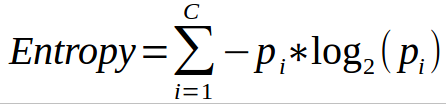
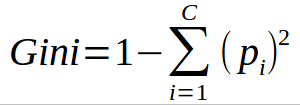

## Iterative Dichotomiser 3 (ID3)

### Funciones auxiliares

In [ ]:
def entropy(array: pd.Series):
    """Calculate the shannon entropy of an array of objects.

    Args:
        array: A pandas series of categorical values.

    Returns:
        entropy: The shannon entropy of the array.
    """
    class_probabilities = array.value_counts() / len(array)
    entropy_value = -np.sum(class_probabilities * np.log2(class_probabilities))
    return entropy_value

In [ ]:
def information_gain(X: pd.DataFrame, y: pd.Series, attribute: str):
    """Gets the information gain of a given attribute.

    Args:
        X: The feature matrix (2D) of the dataset.
        y: The target vector (1D) of the dataset. Also known as class labels, or dependent variable.
        attribute: The attribute to calculate the information gain for.

    Returns:
        information_gain: The information gain of the attribute.
    """
    entropy_before_split = entropy(y)
    values = X[attribute].unique()
    entropy_after_split = 0

    for value in values:
        subset = y[X[attribute] == value]
        entropy_after_split += (len(subset) / len(y)) * entropy(subset)

    information_gain_value = entropy_before_split - entropy_after_split
    return information_gain_value

### Armado del arbol de decision mediante el algoritmo id3

In [ ]:
def id3(X_train: pd.DataFrame, y_train: pd.Series, attributes: List, max_depth=None, min_samples_split=1, min_info_gain=0.0) -> dict:
    """Builds a decision tree using the ID3 algorithm.

    Args:
        X_train: The feature matrix (2D) of the dataset.
        y_train: The target vector (1D) of the dataset. Also known as class labels, or dependent variable.
        attributes: The list of attributes to split on.
        max_depth: The maximum depth of the tree (pre-pruning criterion).
        min_samples_split: The minimum number of samples required to split a node (pre-pruning criterion).
        min_info_gain: The minimum information gain required to split a node (pre-pruning criterion).

    Returns:
        tree: The decision tree in a nested dictionary representation.
    """

    # If all data points belong to the same class, return a leaf node with that class
    if len(y_train.unique()) == 1:
        return str(y_train.iloc[0])
    
    majority_class = y_train.mode().iloc[0]

    # If there are no more attributes to split on, return the majority class
    if len(attributes) == 0:
        return str(majority_class)
    
    # Pre-pruning criteria
    if (max_depth is not None and max_depth <= 0) or (len(y_train) < min_samples_split):
        return str(majority_class)

    # Calculate information gain for each attribute
    information_gains = {attribute: information_gain(X_train, y_train, attribute) for attribute in attributes}

    # Choose the attribute with the highest information gain
    best_attribute = max(information_gains, key=information_gains.get)

    # Pre-pruning criteria
    if information_gain(X_train, y_train, best_attribute) < min_info_gain:
        return str(majority_class)

    # Create a decision tree node with the best attribute
    # Default value when classifying will be the majority class
    tree = {str(best_attribute): {"default": int(majority_class)}}

    # Remove the chosen attribute from the list of attributes
    remaining_attributes = [attr for attr in attributes if attr != best_attribute]

    # Recursively build the tree for each value of the best attribute
    for value in X_train[best_attribute].unique():
        subset = X_train[X_train[best_attribute] == value]
        subtarget = y_train[subset.index]
        subtree = id3(
            X_train=subset,
            y_train=subtarget,
            attributes=remaining_attributes,
            max_depth=max_depth - 1 if max_depth is not None else None,
            min_samples_split=min_samples_split,
            min_info_gain=min_info_gain
        )
        tree[str(best_attribute)][str(value)] = subtree

    return tree

In [ ]:
def id3_random_forest(X_train: pd.DataFrame, y_train: pd.Series, attributes: List, num_features: int, max_depth=None, min_samples_split=1, min_info_gain=0.0) -> dict:
    """Builds a decision tree using the ID3 algorithm.

    Args:
        X_train: The feature matrix (2D) of the dataset.
        y_train: The target vector (1D) of the dataset. Also known as class labels, or dependent variable.
        attributes: The list of attributes to split on.
        num_features: The number of features to randomly select for each tree (Feature Randomness).
        max_depth: The maximum depth of the tree (pre-pruning criterion).
        min_samples_split: The minimum number of samples required to split a node (pre-pruning criterion).
        min_info_gain: The minimum information gain required to split a node (pre-pruning criterion).

    Returns:
        tree: The decision tree in a nested dictionary representation.
    """

    # If all data points belong to the same class, return a leaf node with that class
    if len(y_train.unique()) == 1:
        return str(y_train.iloc[0])
    
    majority_class = y_train.mode().iloc[0]

    # If there are no more attributes to split on, return the majority class
    if len(attributes) == 0:
        return str(majority_class)
    
    # Pre-pruning criteria
    if (max_depth is not None and max_depth <= 0) or (len(y_train) < min_samples_split):
        return str(majority_class)
    
    # Randomly select a subset of attributes for this node (Feature Randomness)
    selected_attributes = np.random.choice(attributes, num_features, replace=False)

    # Calculate information gain for each attribute
    information_gains = {attribute: information_gain(X_train, y_train, attribute) for attribute in selected_attributes}

    # Choose the attribute with the highest information gain
    best_attribute = max(information_gains, key=information_gains.get)

    # Pre-pruning criteria
    if information_gain(X_train, y_train, best_attribute) < min_info_gain:
        return str(majority_class)

    # Create a decision tree node with the best attribute
    # Default value when classifying will be the majority class
    tree = {str(best_attribute): {"default": int(majority_class)}}

    # Remove the chosen attribute from the list of attributes
    remaining_attributes = [attr for attr in attributes if attr != best_attribute]

    # Recursively build the tree for each value of the best attribute
    for value in X_train[best_attribute].unique():
        subset = X_train[X_train[best_attribute] == value]
        subtarget = y_train[subset.index]
        subtree = id3_random_forest(
            X_train=subset,
            y_train=subtarget,
            attributes=remaining_attributes,
            num_features=num_features,
            max_depth=max_depth - 1 if max_depth is not None else None,
            min_samples_split=min_samples_split,
            min_info_gain=min_info_gain
        )
        tree[str(best_attribute)][str(value)] = subtree

    return tree

In [ ]:
def count_nodes(tree):
    """Count the number of nodes in a decision tree.

    Args:
        tree: The decision tree in a nested dictionary representation.

    Returns:
        count: The number of nodes in the tree.
    """
    if isinstance(tree, str) or isinstance(tree, int):  # leaf node
        return 1

    count = 1  # count the current node

    current_node = list(tree.keys())[0] # attribute

    for branch in tree[current_node].values():
        if isinstance(branch, dict):  # internal node
            count += count_nodes(branch)

    return count

In [ ]:
# Build the decision tree
decision_tree = id3(X_train, y_train, attributes=X_train.columns.tolist(), min_samples_split=10, max_depth=5, min_info_gain=0.03)
print(f"Cantidad de nodos del arbol de decision: {count_nodes(decision_tree)}")

In [ ]:
# Pretty print the decision tree
print(json.dumps(decision_tree, indent=4))

In [ ]:
def classify(tree: dict, sample: pd.DataFrame) -> str:
    """Classifies a sample using a given decision tree.

    Args:
        tree: The decision tree in a nested dictionary representation.
        sample: The sample to classify.

    Returns:
        y_hat: The predicted class label.
    """

    if not isinstance(tree, dict):
        return tree
    
    attribute = next(iter(tree))
    sample_value = sample[attribute]
    
    # Recursively classify the sample if the attribute value is in the tree
    if sample_value in tree[attribute]:
        return classify(tree[attribute][sample_value], sample)
    
    # If the attribute value is not in the tree, return the majority class
    return tree[attribute]["default"]

In [ ]:
def evaluate_tree(tree: dict, X_test: pd.DataFrame, y_test: pd.Series) -> float:
    """Evaluates the accuracy of a given decision tree on a dataset.

    Args:
        tree: The decision tree in a nested dictionary representation.
        X_test: The feature matrix (2D) of the dataset.
        y_test: The target vector (1D) of the dataset.

    Returns:
        accuracy: The accuracy of the decision tree on the dataset.
    """
    y_hats = [classify(tree, row) for _, row in X_test.iterrows()]
    correct_predictions = sum(1 for y_hat, y in zip(y_hats, y_test) if y_hat == y)
    
    return correct_predictions / len(X_test)

In [ ]:
# Evaluate the pruned decision tree on the validation data
accuracy_before_pruning = evaluate_tree(decision_tree, X_test, y_test)
print(f"Accuracy before pruning: {accuracy_before_pruning:.2%}")

In [ ]:
    
# # Evaluate the pruned decision tree on the validation data
# accuracy_after_pruning = evaluate_tree(pruned_tree, X_test, X_test)
# print(f"Accuracy after pruning: {accuracy_after_pruning:.2%}")

# Ejercicio 1.c

In [ ]:
np.random.choice(20, size=10)

In [ ]:
# Specify the number of bootstrap samples you want to generate
nbags = 10

# Get the length of your training dataset
training_size = len(X_train)
max_features = X_train.shape[1]

# Specify the fraction of features to consider at each split
features_per_split = 0.5

# Create empty lists to store the bootstrap samples
bags_X = []
bags_y = []

# Perform a loop to generate the bootstrap samples
for _ in range(nbags):
    # Generate random indices with replacement
    indices = np.random.choice(training_size, size=training_size, replace=True)
    
    # Create the bootstrap samples using the indices, and reset the index
    bag_X = X_train.iloc[indices].reset_index(drop=True)
    bag_y = y_train.iloc[indices].reset_index(drop=True)

    # Select a random subset of features
    num_selected_features = int(features_per_split * max_features)
    selected_feature_indices = np.random.choice(max_features, size=num_selected_features, replace=False)
    
    # Keep only the selected features in the bootstrap samples
    bag_X = bag_X.iloc[:, selected_feature_indices].reset_index(drop=True)
    
    # Store the bootstrap samples in the corresponding lists
    bags_X.append(bag_X)
    bags_y.append(bag_y)

In [ ]:
# Check the number of the bags
print(f"Number of bootstrap samples: bags_X: {len(bags_X)}, bags_y: {len(bags_y)}")

# Check the size of each bootstrap sample
print(f"Size of each bootstrap sample: bags_X: {bags_X[0].shape}, bags_y: {bags_y[0].shape}")

In [ ]:
# Create empty lists to store the decision trees
trees = []

# Create a for loop to build a decision tree on each of the bootstrap samples
for i in range(nbags):
    print(f"Building tree {i+1}/{nbags}")
    # Get the current bootstrap sample
    bag_X = bags_X[i]
    bag_y = bags_y[i]
    
    # Build a decision tree on the bootstrap sample
    tree = id3_random_forest(X_train=bag_X, y_train=bag_y, num_features=1, attributes=bag_X.columns.tolist())
    
    # Add the decision tree to the list
    trees.append(tree)

In [ ]:
# Check the difference between two trees
# DeepDiff(trees[0], trees[1])

trees_nodes = [count_nodes(tree) for tree in trees]
print(f"Number of nodes per tree: {trees_nodes}")

In [ ]:
assert len(trees) == nbags

In [ ]:
# Crear una lista para almacenar las predicciones de cada árbol
predictions = [[classify(tree, X_test.iloc[i]) for i in range(len(X_test))] for tree in trees]
print(f"Number of predicitions trees: {len(predictions)}", f"Number of predictions per tree: {len(predictions[0])}")

In [ ]:
final_predictions = [max(set(instance_preds), key=instance_preds.count) for instance_preds in zip(*predictions)]

In [ ]:
accuracy = accuracy_score(y_test, final_predictions)
print("Accuracy:", accuracy)

# Ejercicio 1.d

In [ ]:
# Obtener las predicciones del árbol de decisión en el conjunto de prueba
predictions = [classify(decision_tree, row) for _, row in X_test.iterrows()]

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predictions, normalize='true')

# Crear un DataFrame de Pandas a partir de la matriz de confusión
confusion_df = pd.DataFrame(cm)

# Graficar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Ejercicio 1.e

In [ ]:
def prune_tree(tree: dict, X_train: pd.DataFrame, y_train: pd.Series) -> dict:
    """Prunes a given decision tree using Reduced Error Pruning (REP).

    Args:
        tree: The decision tree in a nested dictionary representation.
        X_train: The feature matrix (2D) of the dataset.
        y_train: The target vector (1D) of the dataset.

    Returns:
        subtree: The pruned subtree.
    """
    if not isinstance(tree, dict):
        return tree
    
    # Recursively prune subtrees
    for _, subtree in tree.items():
        for value, subsubtree in subtree.items():
            subtree[value] = prune_tree(subsubtree, X_train, y_train)
    
    # Calculate accuracy before pruning
    accuracy_before = evaluate_tree(tree, X_train, y_train)
    
    # Calculate accuracy after pruning (replace subtree with majority class)
    majority_class = y_train.mode().iloc[0]
    subtree_error = sum(evaluate_tree(subtree, X_train, y_train) for subtree in tree.values() if isinstance(subtree, dict))
    
    if subtree_error >= accuracy_before or majority_class is None:
        return majority_class
    
    return subtree